# Example of using the handy module 
Useful stuff related to time, and time analysis

In [1]:
import sys
sys.path.insert(0, '../modules')
import handy as hd
from importlib import reload
reload(hd)

<module 'handy' from '../modules\\handy.py'>

In [2]:
import pandas as pd, numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Remove the most annoying pandas warning
# A value is trying to be set on a copy of a slice from a DataFrame.
pd.options.mode.chained_assignment = None

data_dir = '../../data'
src_file = 'sample01.csv'
f = os.path.join(data_dir, src_file)

In [3]:
df = pd.read_csv(f, encoding='latin_1', sep = ';', error_bad_lines=False)

In [4]:
df['created'] = pd.to_datetime(df['created'], format = hd.format_dash, errors = 'coerce')
df['resolved'] = pd.to_datetime(df['resolved'], format = hd.format_dash, errors = 'coerce')
df = hd.augment_columns(df)
df0 = df.copy()

## drawing histograms with correct weekly edges

First incorrect, then correct. The longer version of the same is in histograms workbook.

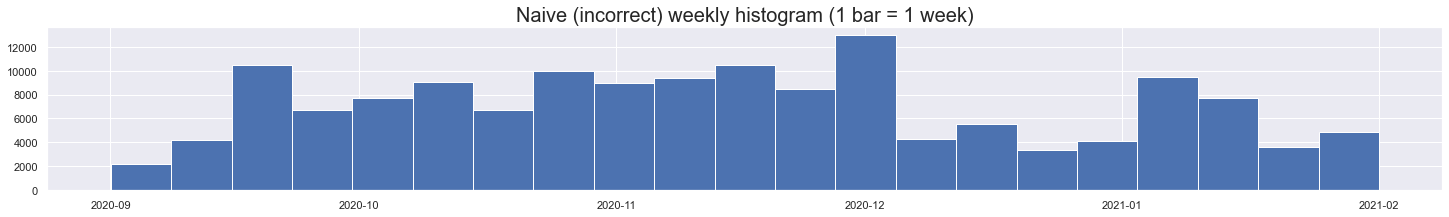

Basic statistics:

Total records:	150179
start:	2020-09-01 00:37:07	Tuesday
end:	2021-01-31 23:59:16	Sunday
weeks: 21.7	records per week:6916.1,	 weekly min:2219,	 weekly max:12971
days: 152	records per day:988.0


In [5]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set()

start, end = df.created.min(), df.created.max()
days = (end - start).days
weeks = days / 7

fig, ax = plt.subplots(1,1, figsize = (25,3))
data = df[(df.created > start) & (df.created < end)].created

axis = ax
w = axis.hist(x= data, bins = int(weeks))
axis.set_title('Naive (incorrect) weekly histogram (1 bar = 1 week)', fontsize = 20)

plt.show()
print('Basic statistics:\n')
print('Total records:\t{}'.format(len(df)))
print('start:\t{}\t{}\nend:\t{}\t{}'.format(start, start.day_name(), end, end.day_name()))
print('weeks: {:.1f}\trecords per week:{:.1f},\t weekly min:{},\t weekly max:{}'.format( weeks, len(df) / weeks, int(min(w[0])), int(max(w[0]))))
print('days: {}\trecords per day:{:.1f}'.format(days, len(df) / days))


In [6]:
ws = hd.WeeklyStats(df.created)

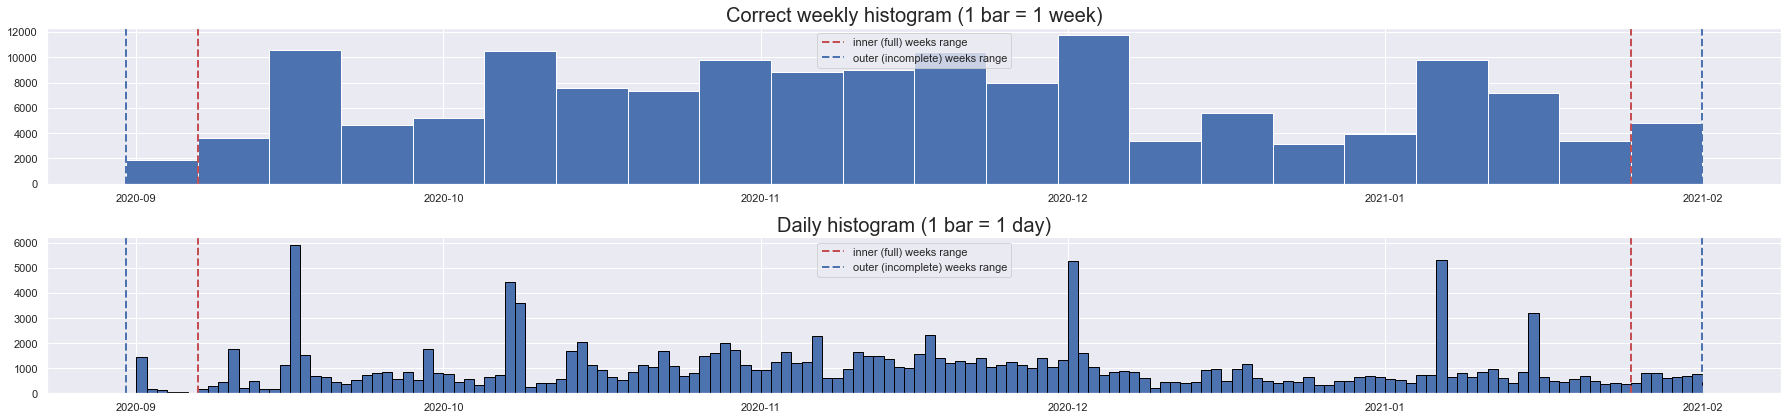

Basic statistics:

Total records:	150179
Histogram range (outer weeks):22
start:	2020-08-31 00:00:00	Monday
end:	2021-02-01 00:00:00	Monday
Data range:
start:	2020-09-01 00:37:07	Tuesday
end:	2021-01-31 23:59:16	Sunday
Full weeks (inner weeks):20
start:	2020-09-07 00:00:00	Monday
end:	2021-01-25 00:00:00	Monday
Data stats:
weeks: 21.9	records per week:6872.1,	 weekly min:3139,	 weekly max:11752
days: 153.0	records per day:981.7,	 daily min:26,	 daily max:5925
Note: The minima do not take into account the marginal (uncomplete) weeks or days


In [7]:
fig, ax = plt.subplots(2,1, figsize = (25,6))
data = df.created

w = hd.weekly_hist(ax[0], data)
ax[0].set_title('Correct weekly histogram (1 bar = 1 week)', fontsize = 20)

d = hd.daily_hist(ax[1], data)
ax[1].set_title('Daily histogram (1 bar = 1 day)', fontsize = 20)

plt.tight_layout()
plt.show()

hd.describe_histogram(ws, week_values = w[0], day_values = d[0])

## using augmented columns, eg. week hour

In [8]:
data_dir = '../../data'
src_file = 'sample02.csv'
f = os.path.join(data_dir, src_file)
df = pd.read_csv(f, encoding='latin_1', sep = ';', error_bad_lines=False)

In [9]:
df.columns

Index(['created', 'resolved', 'category', 'priority'], dtype='object')

In [10]:
df['created'] = pd.to_datetime(df['created'], format = hd.format_dash, errors = 'coerce')
df['resolved'] = pd.to_datetime(df['resolved'], format = hd.format_dash, errors = 'coerce')


In [11]:
df = hd.augment_columns(df)

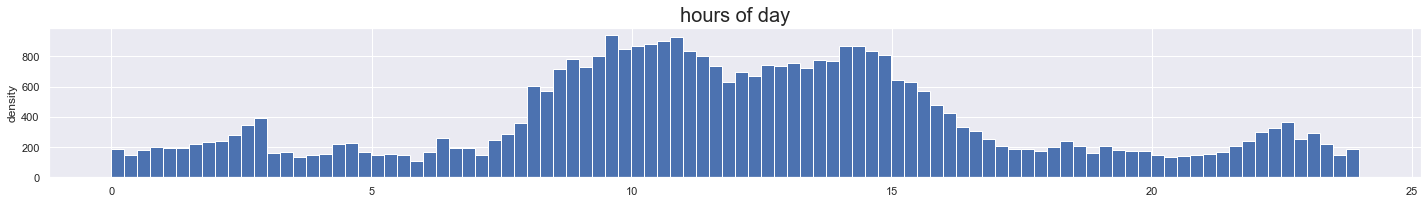

In [12]:
fig, ax  = plt.subplots(1, 1, figsize=(20,3))
axis = ax

axis.hist(df['tod'], bins = 24 * 4)
axis.set_ylabel('density')
axis.set_title("hours of day", fontsize = 20)#, fontsize=16, y=0.94)


plt.tight_layout()

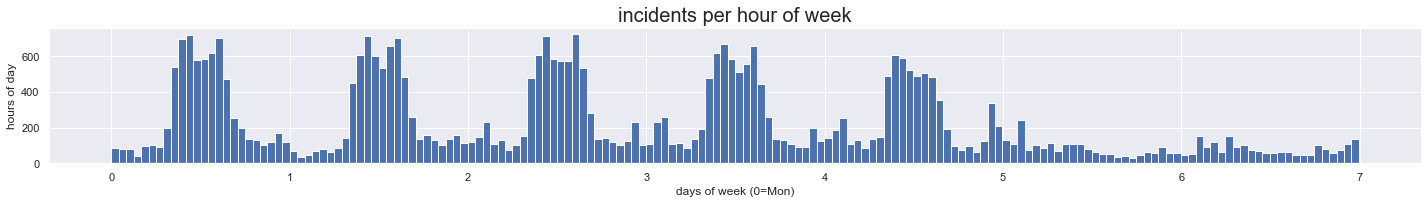

In [13]:
fig, ax  = plt.subplots(1, 1, figsize=(20,3))
axis = ax

axis.hist(df['tow'], bins = 24 * 7)
axis.set_xlabel('days of week (0=Mon)')
axis.set_ylabel('hours of day')
axis.set_title("incidents per hour of week", fontsize = 20)#, fontsize=16, y=0.94)


plt.tight_layout()

In [14]:
len(df.weekhour.unique())

168